<br>

# Recurrent Neural Network (RNN)

classify IMDB reviews by their sentiment with an *RNN*

<br>

<br>

## Load dependencies

In [1]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt

%matplotlib inline

<br>

<br>

## Load data

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

<br>

#### Observation
- num_words = Number of unique word

<br>

<br>

##  Preprocess data

In [3]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                        maxlen=100, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, 
                                                       maxlen=100, 
                                                       padding='pre', 
                                                       truncating='pre', 
                                                       value=0)

<br>

<br>

## RNN architecture

In [4]:
model = tf.keras.models.Sequential()

# Embedding Layer(Taking Inputs) 
model.add(tf.keras.layers.Embedding(input_dim=10000, 
                                    output_dim=64,
                                    input_length=100))

model.add(tf.keras.layers.SpatialDropout1D(0.2))


# RNN Layer
model.add(tf.keras.layers.SimpleRNN(units=256,
                                    activation='tanh',
                                    dropout=0.2)) 


# Output Layer
model.add(tf.keras.layers.Dense(units=1, 
                                activation='sigmoid')) 

#### Observation
- **Embedding layer:** Embedding is a single line for taking all of the natural language or reviews and creating our vector space embedding or so called "word vector". We do it in a single step. We can optionally pre-train our word embeddings and then we don't need to do that in our neural network.


- **SpatialDropout1D(0.2):** We add dropout out to our embedding layer (drop out 20% of neurons on every step)


- Here we only have 2 outcomes (positive and negative sentiment) so we use sigmoid activation function for the output layer

<br>

<br>


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 256)               82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


<br>

<br>


## Configure model

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

<br>

<br>

## Train!

In [7]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=10, 
                    validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/10
22500/22500 [==============================] - 18s 800us/sample - loss: 0.7049 - accuracy: 0.5033 - val_loss: 0.6935 - val_accuracy: 0.5208
Epoch 2/10
22500/22500 [==============================] - 18s 783us/sample - loss: 0.6937 - accuracy: 0.5227 - val_loss: 0.6890 - val_accuracy: 0.5248
Epoch 3/10
22500/22500 [==============================] - 18s 799us/sample - loss: 0.6858 - accuracy: 0.5498 - val_loss: 0.6829 - val_accuracy: 0.5448
Epoch 4/10
22500/22500 [==============================] - 21s 941us/sample - loss: 0.6688 - accuracy: 0.5859 - val_loss: 0.6664 - val_accuracy: 0.5776
Epoch 5/10
22500/22500 [==============================] - 21s 952us/sample - loss: 0.6320 - accuracy: 0.6372 - val_loss: 0.6509 - val_accuracy: 0.5956
Epoch 6/10
22500/22500 [==============================] - 24s 1ms/sample - loss: 0.6006 - accuracy: 0.6686 - val_loss: 0.6742 - val_accuracy: 0.5396
Epoch 7/10
22500/22500 [=======================

<br>

<br>

## Plotting the accuracy 

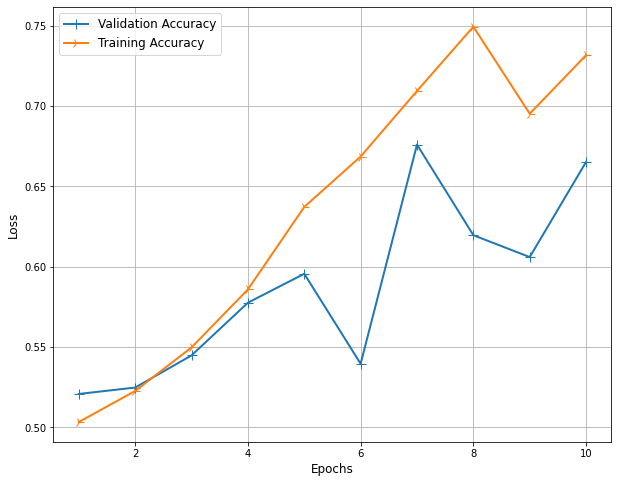

In [8]:
plt.figure(figsize=(10,8))
history_dict = history.history   

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize=12) 
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

<br>

<br>

## Evaluate

In [9]:
score = model.evaluate(x_test, y_test)

print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}\n\n')

25000/25000 [==============================] - 11s 450us/sample - loss: 0.6191 - accuracy: 0.6707
Test Loss: 0.6190999807739258
Test Accuracy: 0.6706799864768982




In [10]:
y_hat = model.predict_proba(x_test)

In [11]:
print(f'Probability that this is a positive review: {y_hat[0]}')
print(f'Original value: {y_test[0]}')

Probability that it is a positive review: [0.29787368]
Original value: 0


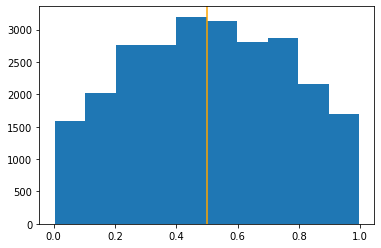

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

<br>

#### Observation 
- If we compare this plot with CNN plot, we can realize that, CNN model is pretty confident that a lot of reviews are either negative or positive. However in RNN there is no such confidence. The distribution is binomial. There is a lot of uncertainty in this output.

<br>

<br>

## Visualizing ROC

Area Under the Curve: 72.95




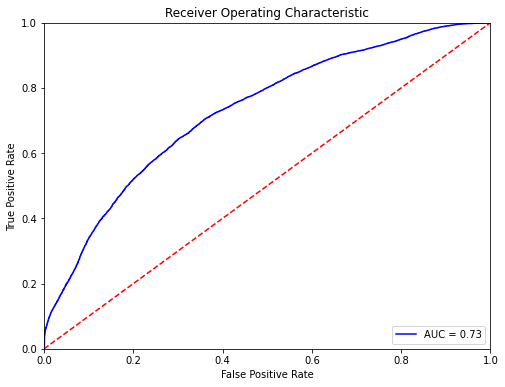

In [13]:
pct_auc = roc_auc_score(y_test, y_hat)*100.0
print(f'Area Under the Curve: {pct_auc:0.2f}\n\n')

plt.figure(figsize=(8,6))

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<br>

---

<br>

<br>


<br>

# Long Short Term Memory (LSTM)

classify IMDB reviews by their sentiment with an *LSTM*

<br>

<br>

<br>

## Load dependencies

In [1]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt

%matplotlib inline

<br>

<br>

## Load data

In [2]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

<br>

#### Observation
- num_words = Number of unique word

<br>

<br>

##  Preprocess data

In [3]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                        maxlen=100, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, 
                                                       maxlen=100, 
                                                       padding='pre', 
                                                       truncating='pre', 
                                                       value=0)

<br>

<br>

## LSTM architecture

In [4]:
model = tf.keras.Sequential()

#  Embedding Layer(Taking Inputs) 
model.add(tf.keras.layers.Embedding(input_dim=10000, 
                                    output_dim=64, 
                                    input_length=100)) 

model.add(tf.keras.layers.SpatialDropout1D(0.2))

#  LSTM Layer 
model.add(tf.keras.layers.LSTM(units=256, 
                               dropout=0.2))


#  Dense Fully Connected Layer 
model.add(tf.keras.layers.Dense(units=128, 
                                activation='relu')) 
model.add(tf.keras.layers.Dropout(0.2))


#  Output Layer 
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [5]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 256)               328704    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,001,729
Trainable params: 1,001,729
Non-trainable params: 0
______________________________________________

<br>

<br>


## Configure model

In [6]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

<br>

<br>

## Train!

In [7]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=5, 
                    validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 113s 5ms/sample - loss: 0.4966 - accuracy: 0.7412 - val_loss: 0.3606 - val_accuracy: 0.8456
Epoch 2/5
22500/22500 [==============================] - 115s 5ms/sample - loss: 0.2920 - accuracy: 0.8803 - val_loss: 0.3789 - val_accuracy: 0.8400
Epoch 3/5
22500/22500 [==============================] - 113s 5ms/sample - loss: 0.2278 - accuracy: 0.9113 - val_loss: 0.3707 - val_accuracy: 0.8360
Epoch 4/5
22500/22500 [==============================] - 116s 5ms/sample - loss: 0.1815 - accuracy: 0.9322 - val_loss: 0.4176 - val_accuracy: 0.8348
Epoch 5/5
22500/22500 [==============================] - 120s 5ms/sample - loss: 0.1440 - accuracy: 0.9478 - val_loss: 0.4482 - val_accuracy: 0.8184


<br>

<br>

## Plotting the accuracy 

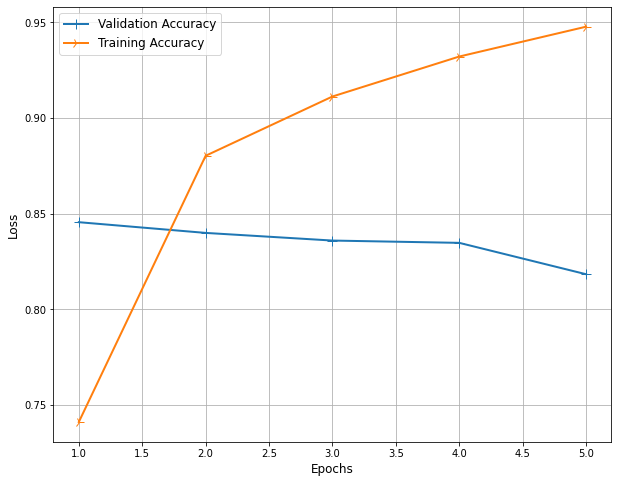

In [8]:
plt.figure(figsize=(10,8))
history_dict = history.history   

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize=12) 
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

<br>

<br>

## Evaluate

In [9]:
score = model.evaluate(x_test, y_test)

print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}\n\n')

25000/25000 [==============================] - 69s 3ms/sample - loss: 0.4369 - accuracy: 0.8305
Test Loss: 0.43694616233825684
Test Accuracy: 0.83051997423172




In [10]:
y_hat = model.predict_proba(x_test)

In [11]:
print(f'Probability that this is a positive review: {y_hat[0]}')
print(f'Original value: {y_test[0]}')

Probability that this is a positive review: [0.08441037]
Original value: 0


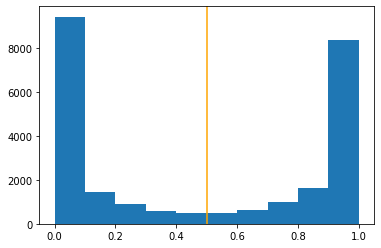

In [12]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

<br>

## Visualizing ROC

Area Under the Curve: 91.12




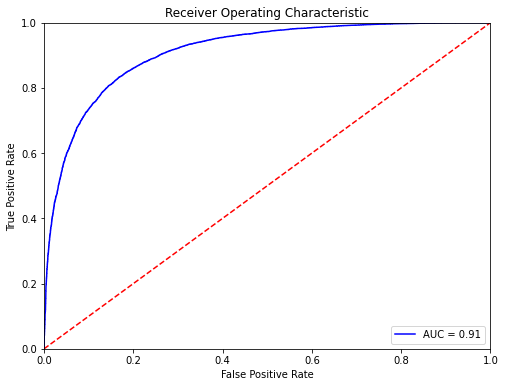

In [13]:
pct_auc = roc_auc_score(y_test, y_hat)*100.0
print(f'Area Under the Curve: {pct_auc:0.2f}\n\n')

plt.figure(figsize=(8,6))

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<br>

---

<br>

<br>


<br>

# Gated Recurrent Unit (GRU)

classify IMDB reviews by their sentiment with an *LSTM*

<br>

<br>

<br>

## Load dependencies

In [1]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score, auc, roc_curve
import matplotlib.pyplot as plt

%matplotlib inline

<br>

<br>

## Load data

In [3]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

<br>

#### Observation
- num_words = Number of unique word

<br>

<br>

##  Preprocess data

In [4]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, 
                                                        maxlen=100, 
                                                        padding='pre', 
                                                        truncating='pre', 
                                                        value=0)

x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, 
                                                       maxlen=100, 
                                                       padding='pre', 
                                                       truncating='pre', 
                                                       value=0)

<br>

<br>

## GRU architecture

In [6]:
model = tf.keras.models.Sequential()


#  Embedding Layer(Taking Inputs) 
model.add(tf.keras.layers.Embedding(input_dim=10000, 
                                    output_dim=64, 
                                    input_length=100)) 

model.add(tf.keras.layers.SpatialDropout1D(0.2))


#  GRU Layer 
model.add(tf.keras.layers.GRU(units=256, 
                              dropout=0.2))


#  Dense Fully Connected Layer 
model.add(tf.keras.layers.Dense(units=128, 
                                activation='relu')) 
model.add(tf.keras.layers.Dropout(0.2))


#  Output Layer 
model.add(tf.keras.layers.Dense(units=1, 
                                activation='sigmoid'))

In [7]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               247296    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 920,321
Trainable params: 920,321
Non-trainable params: 0
________________________________________________

<br>

<br>


## Configure model

In [8]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

<br>

<br>

## Train!

In [9]:
history = model.fit(x_train, 
                    y_train, 
                    batch_size=128, 
                    epochs=5, 
                    validation_split=0.1)

Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 50s 2ms/sample - loss: 0.5296 - accuracy: 0.7169 - val_loss: 0.3773 - val_accuracy: 0.8348
Epoch 2/5
22500/22500 [==============================] - 45s 2ms/sample - loss: 0.3060 - accuracy: 0.8718 - val_loss: 0.3488 - val_accuracy: 0.8484
Epoch 3/5
22500/22500 [==============================] - 58s 3ms/sample - loss: 0.2474 - accuracy: 0.9033 - val_loss: 0.3806 - val_accuracy: 0.8424
Epoch 4/5
22500/22500 [==============================] - 49s 2ms/sample - loss: 0.1991 - accuracy: 0.9229 - val_loss: 0.3833 - val_accuracy: 0.8364
Epoch 5/5
22500/22500 [==============================] - 46s 2ms/sample - loss: 0.1610 - accuracy: 0.9401 - val_loss: 0.4394 - val_accuracy: 0.8312


<br>

<br>

## Plotting the accuracy 

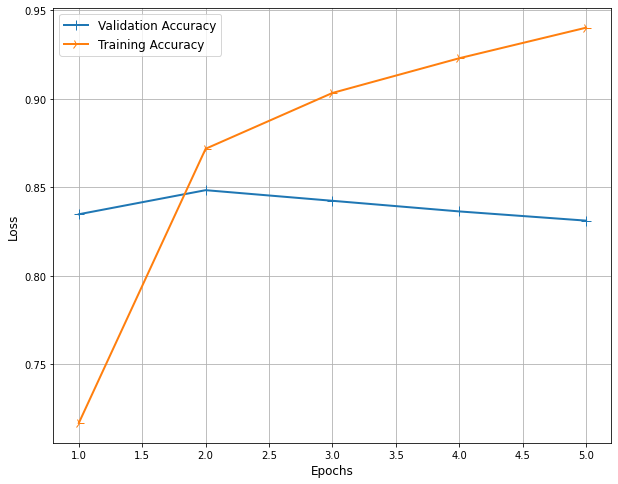

In [10]:
plt.figure(figsize=(10,8))
history_dict = history.history   

loss_values = history_dict['accuracy']
val_loss_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs', fontsize=12) 
plt.ylabel('Loss', fontsize=12)
plt.grid(True)
plt.legend(loc='best', fontsize=12)
plt.show()

<br>

<br>

## Evaluate

In [11]:
score = model.evaluate(x_test, y_test)

print(f'Test Loss: {score[0]}')
print(f'Test Accuracy: {score[1]}\n\n')

25000/25000 [==============================] - 26s 1ms/sample - loss: 0.4254 - accuracy: 0.8387
Test Loss: 0.4253636633205414
Test Accuracy: 0.8386800289154053




In [12]:
y_hat = model.predict_proba(x_test)

In [13]:
print(f'Probability that this is a positive review: {y_hat[0]}')
print(f'Original value: {y_test[0]}')

Probability that this is a positive review: [0.02664285]
Original value: 0


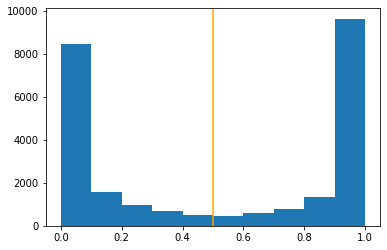

In [14]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

<br>

## Visualizing ROC

Area Under the Curve: 91.85




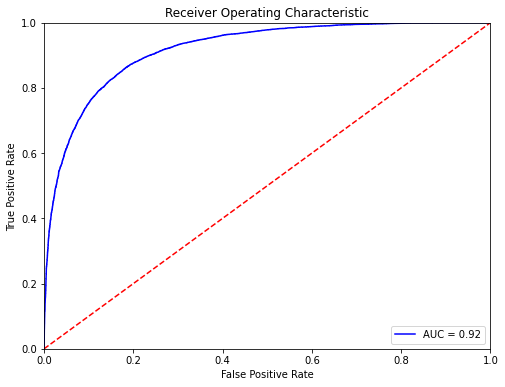

In [15]:
pct_auc = roc_auc_score(y_test, y_hat)*100.0
print(f'Area Under the Curve: {pct_auc:0.2f}\n\n')

plt.figure(figsize=(8,6))

fpr, tpr, threshold = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = f'AUC = {roc_auc:0.2f}')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<br>

<br>

## Summary
- In practice RNNs are used seldom in Natural Language Processing,in this simple form with just a single tanh layer inside of each little neural network. 


- The problem with RNN is that they just backpropagate through time or over the previous words in the sentence and they aren't able to vary their weight too much based on the importance of the information going back and they can't stretch very far back through time. So, after about 10 time steps, the vanishing gradient problem happens, means that we are rarely able to get information from 11 words before the current word learning and sometimes those words are quite important to figuring out our down stream task like sentitment classification neural network.


- The trick that LSTM has is that they have quite complexity going on within the neural network module. In addition to tanh layer, that a simple RNN has, the LSTM also has 3 sigmoid gates(`forget`, `input`, `output`) inside of it. In this instance that enable them to act gates as information. So, they can decide how much information to pass through. If they weigh down to zero, no information is being pass through and if they weigh up to 1 all the information is being passed through. These three gates enable information about words in the past to be retained if they appear to be important for the task later on such as sentiment classification.


- GRU(Gated Recurrent Unit): GRU is another variant on the RNN. They quite similar to LSTM. They are also designed to selectively retain information from the past, using the gate idea within modules. The GRUs only have two gates. There are other difference between them. The GRU was invented about 15 years later than LSTM. In some instances GRU works more efficiently than LSTM. In practice, It seems that LSTM tends to work better.   


- [For more information about LSTM and RNN](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)